<a href="https://colab.research.google.com/github/ninjab3381/CNN_Robotic_Inference/blob/master/cnn_resnet_h5model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import keras
print(tf.__version__)

2.1.0


In [0]:
IMAGE_SIZE = 224
BATCH_SIZE = 16

In [41]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 11))

In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

from tensorflow.keras.applications import(
    vgg16, 
    inception_v3, 
    resnet50,
    mobilenet, 
    MobileNetV2
)
import numpy as np

# Create the base model from the pre-trained model MobileNet V2
base_model = resnet50.ResNet50(input_shape=IMG_SHAPE,
                   include_top=False, 
                   weights='imagenet')

In [0]:
base_model.trainable = False

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model = Sequential([
  base_model,
])
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax'))

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                363       
Total params: 24,177,931
Trainable params: 590,219
Non-trainable params: 23,587,712
_________________________________________________________________


In [47]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [48]:
epochs = 20

history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 2 steps
Epoch 1/20
13/13 [==============================] - 13s 1s/step - loss: 1.9315 - accuracy: 0.5859 - val_loss: 2.8578 - val_accuracy: 0.0909
Epoch 2/20
13/13 [==============================] - 10s 795ms/step - loss: 0.1960 - accuracy: 0.9520 - val_loss: 2.8867 - val_accuracy: 0.1136
Epoch 3/20
13/13 [==============================] - 10s 797ms/step - loss: 0.0570 - accuracy: 0.9899 - val_loss: 3.2976 - val_accuracy: 0.0909
Epoch 4/20
13/13 [==============================] - 10s 789ms/step - loss: 0.0215 - accuracy: 0.9975 - val_loss: 3.3720 - val_accuracy: 0.0909
Epoch 5/20
13/13 [==============================] - 10s 789ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.5914 - val_accuracy: 0.0909
Epoch 6/20
13/13 [==============================] - 11s 814ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.6848 - val_accuracy: 0.0909
Epoch 7/20
13/13 [==============================] - 10

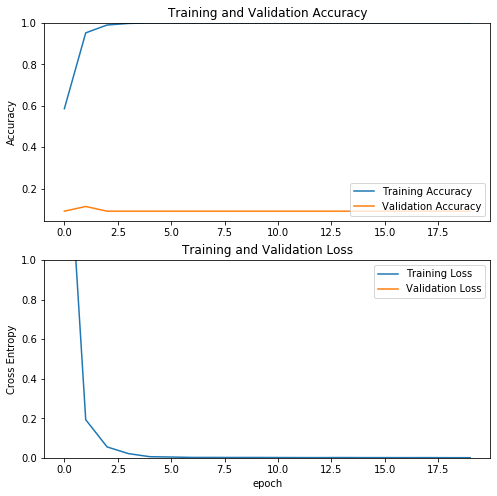

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                363       
Total params: 24,177,931
Trainable params: 590,219
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
path = F"/content/drive/My Drive/Models/Resnet50/testh5/resnet_model_skim.h5"
model.save(path)

In [0]:
base_model.trainable = True

In [53]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 40

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                363       
Total params: 24,177,931
Trainable params: 23,865,099
Non-trainable params: 312,832
_________________________________________________________________


In [56]:
history_fine = model.fit_generator(train_generator, 
                                   epochs=10,
                                   validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 2 steps
Epoch 1/10
13/13 [==============================] - 16s 1s/step - loss: 4.5707e-04 - accuracy: 1.0000 - val_loss: 3.6453 - val_accuracy: 0.0909
Epoch 2/10
13/13 [==============================] - 11s 843ms/step - loss: 1.7133e-04 - accuracy: 1.0000 - val_loss: 3.6765 - val_accuracy: 0.0909
Epoch 3/10
13/13 [==============================] - 11s 857ms/step - loss: 8.8626e-05 - accuracy: 1.0000 - val_loss: 3.6781 - val_accuracy: 0.0909
Epoch 4/10
13/13 [==============================] - 11s 853ms/step - loss: 2.5236e-05 - accuracy: 1.0000 - val_loss: 3.8433 - val_accuracy: 0.0909
Epoch 5/10
13/13 [==============================] - 11s 849ms/step - loss: 5.0238e-05 - accuracy: 1.0000 - val_loss: 4.2451 - val_accuracy: 0.0909
Epoch 6/10
13/13 [==============================] - 11s 837ms/step - loss: 3.3585e-05 - accuracy: 1.0000 - val_loss: 5.2971 - val_accuracy: 0.0909
Epoch 7/10
13/13 [============

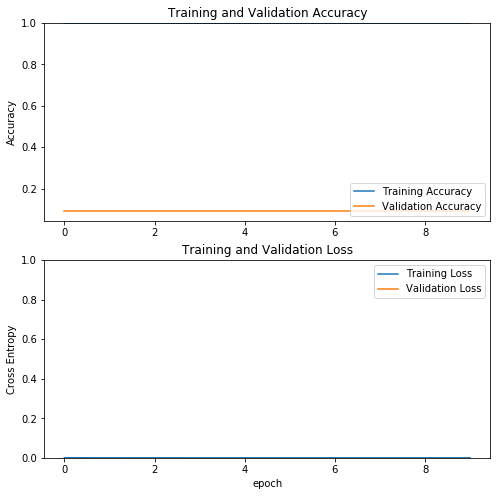

In [57]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [58]:
model.input_shape

(None, 224, 224, 3)

In [0]:
path = F"/content/drive/My Drive/Models/Resnet50/testh5/resnet_model.h5"
model.save(path)